<h1><center> Tópicos Avançados em Python para Análise de Dados </center></h1>

![](https://drive.google.com/uc?export=view&id=1qCH-jlzKK1aFaTBpiTHN4qxTFrCVs720) 

<center>
<h5>
O objetivo desse material é mostrar a você como aplicar diversos métodos das duas bibliotecas mais famosas para Ciência de Dados: Pandas e Seaborn. Ao longo do curso além de conhecermos como essas ferramentas funcionam vamos praticar a análise em dados reais e transformar os dados que temos em informações. 
Vamos nessa!
<h5>
<center>

## Módulo 5

### Exercício 3

#### Parte 1: 

Durante esse exercício vamos trabalhar com a base de dados [IMDB movie-dataset](https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset). Nele, temos as seguintes informações:

* Color -> tipo de cor do filme: preto e branco ou colorido
* Director Name -> nome do diretor do filme
* Num critic for reviews -> Número de críticas do filme
* Duration -> Duração do filme 
* Gross -> Refere-se ao lucro bruto de bilheteria de um filme em dólares americanos
* Director facebook likes -> Quantidade de likes que o diretor possui no facebook 
* Actor facebook likes -> Quantidade de likes do ator no facebook
* Actor name -> Nome do ator
* Genres -> Gêneros presentes no filme
* Movie title -> Nome do filme
* Num voted user -> Quantidade de pessoas que votaram no filmes
* Cast total facebook likes -> Quantidade total de likes no facebook de todo o elenco
* Facenumber in poster -> Quantidade de rostos no poster
* Plot keywords -> Principais palavras chaves do filme
* Movie IMDB link -> Link do IMDB (Internet Movie Database) do filme
* Num users for review -> Quantidade de usuários para a avaliação
* Language -> Idioma do filme
* Country -> País de origem do filme
* Content rating -> Classificação do conteúdo
* Budget -> Orçamento do filme
* Title year -> Ano do título do
* IMDB Score -> Pontuação do filme no IMDB
* Aspect ratio -> Proporção da tela do filme
* Movie facebook likes -> Quantidade de likes do filme no facebook


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1) Importe a base de dados com a ajuda do Pandas e veja se a importação foi feita corretamente

In [ ]:
dados = pd.read_csv('movie_metadata.csv')
dados.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


2) Verifique se temos dados duplicados na nossa base. Se tivermos, remova-os

In [ ]:
dados.duplicated().sum()

45

In [ ]:
dados = dados.drop_duplicates()
dados.duplicated().sum()

0

3) Depois de ter apagados as linhas duplicadas, verifique se temos dados duplicados a partir das colunas **nome do diretor**, **nome do filme** e **ano do filme** (isso significa que se as informações nessas três colunas forem iguais, os dados serão considerados dados duplicados)

Para isso reveja o parâmetro [subset](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html)

In [ ]:
subset = ['director_name', 'movie_title', 'title_year']
dados.duplicated(subset=subset).sum()

79

In [ ]:
duplicados = dados.duplicated(subset=['director_name', 'movie_title', 'title_year'])
dados[duplicados][subset]

,director_name,movie_title,title_year
1122,Pete Travis,Dredd,2012.0
1332,Rob Cohen,The Fast and the Furious,2001.0
1508,Roland Joffé,The Lovers,2015.0
1582,Paul Feig,Ghostbusters,2016.0
1805,Jon Favreau,The Jungle Book,2016.0
...,...,...,...
4894,Richard Fleischer,"20,000 Leagues Under the Sea",1954.0
4905,Steven Soderbergh,Side Effects,2013.0
4936,Tobe Hooper,The Texas Chain Saw Massacre,1974.0
4971,Dennis Iliadis,The Last House on the Left,2009.0


In [ ]:
dados[dados.movie_title == 'The Jungle Book\xa0']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
79,Color,Jon Favreau,370.0,106.0,4000.0,591.0,Bill Murray,19000.0,362645141.0,Adventure|Drama|Family|Fantasy,Scarlett Johansson,The Jungle Book,106072,32921,Garry Shandling,0.0,fire|jungle|remake|tiger|wolf,http://www.imdb.com/title/tt3040964/?ref_=fn_t...,398.0,English,UK,PG,175000000.0,2016.0,13000.0,7.8,1.85,65000
1805,Color,Jon Favreau,370.0,106.0,4000.0,591.0,Bill Murray,19000.0,362645141.0,Adventure|Drama|Family|Fantasy,Scarlett Johansson,The Jungle Book,106221,32921,Garry Shandling,0.0,fire|jungle|remake|tiger|wolf,http://www.imdb.com/title/tt3040964/?ref_=fn_t...,398.0,English,UK,PG,175000000.0,2016.0,13000.0,7.8,1.85,65000


In [ ]:
dados = dados.drop_duplicates(subset=['director_name', 'movie_title', 'title_year'], keep='last')
dados.duplicated().sum()

0

#### Parte 2:

4) A partir da coluna *genres* crie uma nova coluna que relata o gênero principal do filme. Para isso, considere o gênero principal sendo o primeiro que aparece na coluna *geners*. Em seguida, respoda: qual o gênero mais popular entre os filmes? Ele é o que apresenta maior *IMDB score*?

Dica: use o [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) para ver o intervalo e a concentração dos IMDB scores dos gêneros

In [ ]:
dados['genero_principal'] = dados.genres.str.split('|').str[0]

In [ ]:
dados.genero_principal.value_counts()

Comedy         1314
Action         1113
Drama           944
Adventure       439
Crime           341
Biography       250
Horror          222
Documentary      84
Animation        61
Fantasy          48
Mystery          32
Thriller         21
Sci-Fi           13
Western          12
Family           11
Romance           6
Musical           4
History           1
Game-Show         1
Music             1
Film-Noir         1
Name: genero_principal, dtype: int64

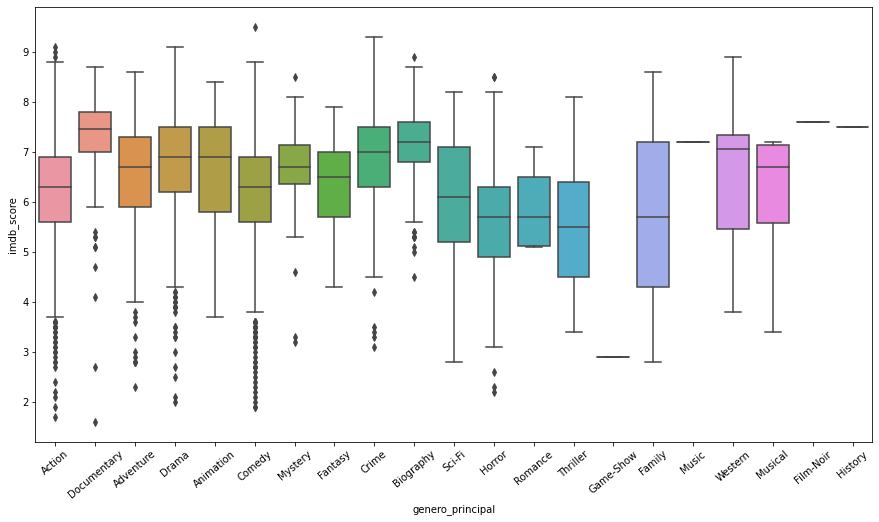

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='genero_principal', y='imdb_score', data=dados)
plt.xticks(rotation=40)
plt.show()

5) A partir do boxplot criado no exercício anterior, crie uma função para identificar outliers. Em seguida, mostre quais são os nomes dos filmes do tipo comédia e documentário que possuem IMDBs como outliers.

In [ ]:
def val_outlier(x):

  box = x.describe()

  q1 = box['25%']
  q3 = box['75%']
  IQR = q3 - q1

  maximo = round(q3 + 1.5*IQR, 2 )
  minimo = round(q1 - 1.5*IQR, 2)

  return [minimo, maximo]


limites_genero = dados.groupby('genero_principal').imdb_score.agg(val_outlier)
limites_genero

genero_principal
Action           [3.65, 8.85]
Adventure          [3.8, 9.4]
Animation       [3.25, 10.05]
Biography          [5.6, 8.8]
Comedy           [3.65, 8.85]
Crime              [4.5, 9.3]
Documentary        [5.8, 9.0]
Drama            [4.25, 9.45]
Family         [-0.05, 11.55]
Fantasy          [3.75, 8.95]
Film-Noir          [7.6, 7.6]
Game-Show          [2.9, 2.9]
History            [7.5, 7.5]
Horror             [2.8, 8.4]
Music              [7.2, 7.2]
Musical          [3.25, 9.45]
Mystery          [5.19, 8.29]
Romance          [3.06, 8.56]
Sci-Fi           [2.35, 9.95]
Thriller         [1.65, 9.25]
Western         [2.64, 10.14]
Name: imdb_score, dtype: object

In [ ]:
dados[(dados.genero_principal == 'Comedy') & (dados.imdb_score > limites_genero['Comedy'][1])]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genero_principal
2765,Color,John Blanchard,NaN,65.0,0.0,176.0,Andrea Martin,770.0,NaN,Comedy,Martin Short,Towering Inferno,10,1125,Joe Flaherty,2.0,NaN,http://www.imdb.com/title/tt0691996/?ref_=fn_t...,NaN,English,Canada,NaN,NaN,NaN,179.0,9.5,1.33,0,Comedy


In [ ]:
dados[(dados.genero_principal == 'Documentary') & (dados.imdb_score < limites_genero['Documentary'][0])]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genero_principal
2834,Color,Jon M. Chu,84.0,115.0,209.0,41.0,Sean Kingston,569.0,73000942.0,Documentary|Music,Usher Raymond,Justin Bieber: Never Say Never,74351,714,Boys II Men,1.0,boyhood friend|manager|plasma tv|prodigy|star,http://www.imdb.com/title/tt1702443/?ref_=fn_t...,233.0,English,USA,G,13000000.0,2011.0,69.0,1.6,1.85,62000,Documentary
3152,Color,Morgan Spurlock,83.0,106.0,293.0,547.0,Zayn Malik,773.0,28873374.0,Documentary|Music,Harry Styles,One Direction: This Is Us,22161,2787,Niall Horan,11.0,3 dimensional|concert footage|englishman abroa...,http://www.imdb.com/title/tt2515086/?ref_=fn_t...,68.0,English,USA,PG,10000000.0,2013.0,734.0,4.1,1.85,0,Documentary
3310,Color,Kevin Tancharoen,67.0,84.0,64.0,748.0,Heather Morris,2000.0,11860839.0,Documentary|Music,Lea Michele,Glee: The 3D Concert Movie,5156,4617,Kevin McHale,0.0,concert|live in concert recording|live perform...,http://www.imdb.com/title/tt1922612/?ref_=fn_t...,21.0,English,USA,PG,9000000.0,2011.0,892.0,5.4,1.85,0,Documentary
3923,Color,Rick de Oliveira,52.0,96.0,2.0,0.0,Alan Taylor,960.0,3713002.0,Documentary,Laura Ramsey,The Real Cancun,3611,972,Benjamin Fletcher,1.0,cancun mexico|mexico|spring break|vacation|wis...,http://www.imdb.com/title/tt0360916/?ref_=fn_t...,62.0,English,USA,R,8000000.0,2003.0,12.0,2.7,1.85,131,Documentary
4181,Color,Dinesh D'Souza,30.0,87.0,67.0,67.0,Zackary Steven Graham,871.0,33349949.0,Documentary,Barack Obama,2016: Obama's America,9010,1111,Dinesh D'Souza,0.0,critically bashed|partisan commentary|politica...,http://www.imdb.com/title/tt2247692/?ref_=fn_t...,199.0,English,USA,PG,2500000.0,2012.0,118.0,5.1,1.85,0,Documentary
4338,Color,Michael Moore,27.0,102.0,909.0,119.0,Eddie Vedder,909.0,NaN,Documentary,Michael Moore,Slacker Uprising,2242,1674,Steve Earle,0.0,character name in title|election campaign|pres...,http://www.imdb.com/title/tt0850669/?ref_=fn_t...,15.0,English,USA,NaN,2000000.0,2007.0,562.0,5.3,NaN,69,Documentary
4519,Color,Harry Gantz,12.0,105.0,0.0,NaN,NaN,NaN,247740.0,Documentary|Drama,NaN,Sex with Strangers,285,0,NaN,0.0,bisexual|explicit sex|sex|stranger|swing,http://www.imdb.com/title/tt0304692/?ref_=fn_t...,8.0,English,USA,NaN,NaN,2002.0,NaN,4.7,1.33,51,Documentary
4800,Color,Ray Griggs,4.0,92.0,4.0,12.0,Chris Cox,93.0,425899.0,Documentary,Bill Farmer,I Want Your Money,1123,168,Mike Huckabee,0.0,NaN,http://www.imdb.com/title/tt1560957/?ref_=fn_t...,31.0,English,USA,PG,400000.0,2010.0,31.0,5.1,1.78,638,Documentary
4939,Black and White,Deborah Anderson,16.0,66.0,4.0,232.0,Jesse Jane,502.0,NaN,Documentary,Lisa Ann,Aroused,502,1796,Kayden Kross,0.0,aroused|photography|pornography documentary|po...,http://www.imdb.com/title/tt2403815/?ref_=fn_t...,9.0,English,USA,NaN,150000.0,2013.0,366.0,5.3,NaN,207,Documentary


#### Parte 3:

6) Verifique se temos dados *NaN* dentro da nossa base e quantos são no total

In [ ]:
dados.isna().sum()

color                         19
director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        863
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                151
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               301
budget                       484
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 326
movie_facebook_likes           0
genero_principal               0
dtype: int64

In [ ]:
print('Total de valores NaN dentro da base:')
print(dados.isna().sum().sum())

Total de valores NaN dentro da base:
2655


7) Analisando a base de dados, podemos fazer diferente tipos de preenchimento de dados faltantes. Ao longo desse exercício vamos trabalhar algumas possibilidades:

* Com base na probabilidade de um filme com um dado ano ser *colorido* ou *preto e branco* preencha os dados faltantes dessa coluna.

In [ ]:
dados[dados.color.isna()][['color', 'title_year']] 

,color,title_year
4,NaN,NaN
279,NaN,NaN
459,NaN,NaN
1948,NaN,2010.0
2015,NaN,2014.0
2459,NaN,NaN
2753,NaN,2009.0
3272,NaN,2015.0
3539,NaN,2014.0
3638,NaN,2011.0


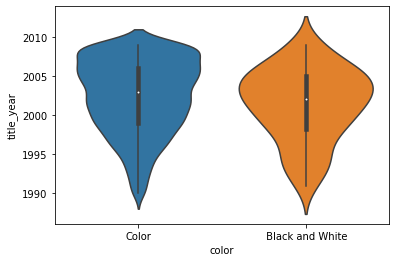

In [ ]:
sns.violinplot(data=dados[(dados.title_year >= 1990) & (dados.title_year < 2010)], x='color', y='title_year')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

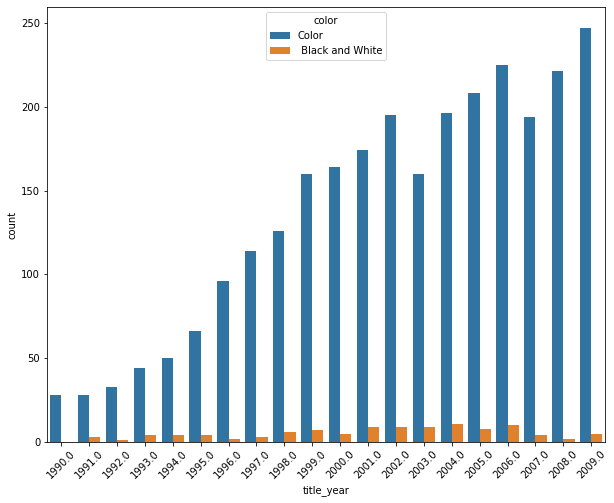

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data= dados[(dados.title_year >= 1990) & (dados.title_year < 2010)],  x='title_year', hue='color')
plt.xticks(rotation=45)

In [ ]:
color_nan = dados[(dados.color.isna()) & (dados.title_year.notna())][['color', 'title_year']] 
color_nan

,color,title_year
1948,NaN,2010.0
2015,NaN,2014.0
2753,NaN,2009.0
3272,NaN,2015.0
3539,NaN,2014.0
3638,NaN,2011.0
3656,NaN,2012.0
4138,NaN,2014.0
4215,NaN,2015.0
4331,NaN,2012.0


In [ ]:
dados.loc[color_nan.index, 'color'] = 'Color'

In [ ]:
dados.loc[color_nan.index]

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,genero_principal
1948,Color,Lasse Hallström,162.0,108.0,529.0,690.0,Henry Thomas,17000.0,80014842.0,Drama|Romance|War,Channing Tatum,Dear John,104356,19945,Scott Porter,NaN,army|coin collector|love|surfboard|u.s. army,http://www.imdb.com/title/tt0989757/?ref_=fn_t...,186.0,English,USA,PG-13,25000000.0,2010.0,861.0,6.3,2.35,14000,Drama
2015,Color,Mario Van Peebles,7.0,100.0,535.0,399.0,Mario Van Peebles,668.0,NaN,Action|Thriller,Martin Kove,Red Sky,1084,2204,Jacob Vargas,0.0,exploding airplane|fighter pilot|hands tied|he...,http://www.imdb.com/title/tt1946381/?ref_=fn_t...,11.0,English,USA,PG-13,25000000.0,2014.0,535.0,4.1,NaN,437,Action
2753,Color,Tung-Shing Yee,53.0,119.0,3.0,19.0,Daniel Wu,556.0,NaN,Action|Crime|Drama|Thriller,Bingbing Fan,Shinjuku Incident,9177,996,Yasuaki Kurata,4.0,chinese|gang|gratitude|immigrant|japan,http://www.imdb.com/title/tt1075419/?ref_=fn_t...,53.0,Mandarin,Hong Kong,R,15000000.0,2009.0,353.0,7.1,2.35,821,Action
3272,Color,David Hackl,48.0,94.0,43.0,129.0,Michaela McManus,826.0,NaN,Action|Horror|Thriller,Scott Glenn,Into the Grizzly Maze,4486,1586,Luisa D'Oliveira,4.0,bear|breasts|female nudity|grizzly|wilderness,http://www.imdb.com/title/tt1694021/?ref_=fn_t...,38.0,English,USA,R,10000000.0,2015.0,476.0,5.3,1.85,0,Action
3539,Color,Richard Rich,2.0,45.0,24.0,29.0,Kate Higgins,122.0,NaN,Action|Adventure|Animation|Comedy|Drama|Family...,Debi Derryberry,Alpha and Omega 4: The Legend of the Saw Tooth...,192,236,Cindy Robinson,0.0,blindness|cave|spirit|wolf|wolf cub,http://www.imdb.com/title/tt4061848/?ref_=fn_t...,6.0,NaN,USA,NaN,7000000.0,2014.0,35.0,6.0,NaN,41,Action
3638,Color,Wayne Wang,56.0,104.0,61.0,451.0,Russell Wong,974.0,1346503.0,Drama|History,Bingbing Li,Snow Flower and the Secret Fan,3024,2430,Ji-hyun Jun,0.0,car hitting pedestrian|china|fan|nineteenth ce...,http://www.imdb.com/title/tt1541995/?ref_=fn_t...,22.0,English,China,PG-13,6000000.0,2011.0,595.0,6.1,2.35,0,Drama
3656,Color,Charles Matthau,13.0,90.0,139.0,1000.0,Michael Jai White,2000.0,NaN,Comedy|Crime|Thriller,Billy Burke,Freaky Deaky,6741,6569,Bill Duke,0.0,black panties|bomb squad|car bomb|dynamite|gir...,http://www.imdb.com/title/tt0938305/?ref_=fn_t...,11.0,English,USA,R,6000000.0,2012.0,2000.0,6.5,NaN,0,Comedy
4138,Color,Darin Scott,7.0,95.0,39.0,375.0,Shantel VanSanten,1000.0,NaN,Drama|Horror|Mystery|Thriller,Julian Morris,Something Wicked,976,3024,John Robinson,2.0,eugene oregon|independent film|obsession,http://www.imdb.com/title/tt1327601/?ref_=fn_t...,15.0,English,USA,R,3000000.0,2014.0,747.0,4.8,NaN,395,Drama
4215,Color,Zackary Adler,10.0,110.0,0.0,109.0,Kevin Leslie,490.0,NaN,Crime|Drama,Simon Merrells,The Rise of the Krays,1510,881,Kris Sommerville,0.0,NaN,http://www.imdb.com/title/tt2945796/?ref_=fn_t...,26.0,English,UK,R,2500000.0,2015.0,159.0,5.0,NaN,0,Crime
4331,Color,Jonas Åkerlund,33.0,96.0,68.0,722.0,Saffron Burrows,2000.0,NaN,Comedy|Crime|Drama,Noel Gugliemi,Small Apartments,5732,3683,Matt Lucas,6.0,fire investigator|landlord|suicide|talking to ...,http://www.imdb.com/title/tt1272886/?ref_=fn_t...,26.0,English,USA,R,2000000.0,2012.0,811.0,6.1,1.85,0,Comedy


#### Parte 4

* Para as outras colunas numéricas como número de criticas para avaliações, quantidade de likes no facebook, etc, preencha com a média dos valores presentes nas colunas.

Colunas: ['num_critic_for_reviews',
 'duration', 'director_facebook_likes','actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'title_year',
 'actor_2_facebook_likes',
 'movie_facebook_likes']



In [ ]:
colunas = ['num_critic_for_reviews', 'duration', 'director_facebook_likes',
           'actor_3_facebook_likes', 'actor_1_facebook_likes', 'num_voted_users', 
           'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'title_year',
           'actor_2_facebook_likes', 'movie_facebook_likes']

In [ ]:
media = []

for i in colunas:
    m = round(dados[i].mean(),2)
    media.append(m)

for i in range(len(colunas)):
    dados[colunas[i]] = dados[colunas[i]].fillna(media[i])


In [ ]:
dados.isna().sum()

color                          4
director_name                102
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                        863
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster           0
plot_keywords                151
movie_imdb_link                0
num_user_for_reviews           0
language                      12
country                        5
content_rating               301
budget                       484
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
genero_principal               0
dtype: int64

#### Parte 5

* Preencha os dados faltantes da coluna *aspect_ratio* (Proporção da tela do filme) com a moda dos valores em relação ao gênero principal.


In [ ]:
dados.groupby('genero_principal').aspect_ratio.agg('mean')

genero_principal
Action         2.284094
Adventure      2.159403
Animation      1.857368
Biography      2.138408
Comedy         2.095012
Crime          2.534509
Documentary    2.593585
Drama          2.288347
Family         3.940000
Fantasy        1.996522
Film-Noir      1.370000
Game-Show           NaN
History             NaN
Horror         2.150976
Music          2.350000
Musical        1.696667
Mystery        2.247667
Romance        2.016667
Sci-Fi         2.141667
Thriller       1.871818
Western        2.055455
Name: aspect_ratio, dtype: float64

In [ ]:
df_na    = dados[dados.aspect_ratio.isna()] #garantir que o genero esteja preenchido
df_notna = dados[dados.aspect_ratio.notna()]

def aspect_ratio_mais_frequente(df_na, df_notna):
  g_na = df_na.genero_principal
  g_mais_freq = df_notna[df_notna.genero_principal == g_na].aspect_ratio.value_counts()
  # print(g_mais_freq)

  if g_mais_freq.empty:
    return None
  else:
    return g_mais_freq.idxmax()

res = df_na.apply(aspect_ratio_mais_frequente, args=(df_notna, ), axis=1)
res

4       1.85
199     2.35
206     1.85
279     1.85
507     1.85
        ... 
5034    1.85
5036    2.35
5037    1.85
5038    1.85
5040    2.35
Length: 326, dtype: float64

In [ ]:
dados.loc[res.index, 'aspect_ratio'] = res.values

In [ ]:
dados.isna().sum()

color                          4
director_name                102
num_critic_for_reviews        49
duration                      15
director_facebook_likes      102
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        863
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                151
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               301
budget                       484
title_year                   106
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
genero_principal               0
dtype: int64

8) Retire o restante das instâncias que possuem dados faltantes na base de dados

In [ ]:
dados.dropna(inplace=True)

In [ ]:
dados.isna().sum()

8) Depois do tratamento feito, salve a base de dados para que ela esteja pronta pra futuras utilizações

In [ ]:
dados.to_csv('movie_metadata_limpo.csv', index=False)